<a href="https://colab.research.google.com/github/aborundiya/NeuralNetwork/blob/master/SigmoidVsFeedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this notebook :
1. Generate data that is not linearly separable
2. Train with Sigmoid Neuron and see performance
3. Write from scratch for first feed forward network
4. Train the Feed Forward network on the data and compare with Sigmoid Neuron



#Import the needed libraries 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook 
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

#Sigmoid Neuron Class

In [0]:
class SigmoidNeuron : 
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x,self.w.T) + self.b

  def sigmoid(self,x):
    return (1.0 / (1.0 + np.exp(-x)))
  
  def grad_w_mse(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x 
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y ) * y_pred * (1 - y_pred )
  
  def grad_w_ce(self, x ,y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0 :
      return y_pred * x 
    elif y == 1 :
      return -1 * (1 - y_pred) * x 
    else: 
      raise ValueError("y should be 0 or 1")

  def grad_b_ce(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))

    if y == 0 :
      return y_pred
    elif y == 1 :
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1 ")
    
  def fit(self, X, Y, epochs = 1 , learning_rate = 1 , initialise = True, loss_func = "mse", display_loss = False):

    if initialise : 
      self.w = np.random.randn(1,X.shape[1])
      self.b = 0 
    
    if display_loss:
      loss = {}

    for i in tqdm_notebook(range(epochs), total = epochs , unit = "epoch"):
      dw = 0 
      db = 0
      for x , y in zip(X,Y):
        if loss_func == "mse":
          dw += self.grad_w_mse(x,y)
          db += self.grad_b_mse(x,y)
        elif loss_func =="ce":
          dw += self.grad_w_ce(x,y)
          db += self.grad_b_ce(x,y)
      
      m = X.shape[1]
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m 

      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_func == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_func == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_func == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_func == "ce":
        plt.ylabel('Log Loss')
      plt.show()


  def predict(self,X):
    Y_pred = []
    for x in X : 
      pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(pred)
    return np.array(Y_pred)


In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])
np.random.seed(0)

#Generating data through blobs library and spliting it in train and validation datasets

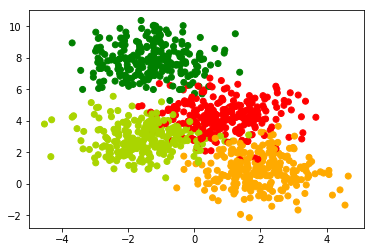

In [67]:
data , labels = make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)
plt.scatter(data[:,0],data[:,1],c = labels, cmap = my_cmap)
plt.show()

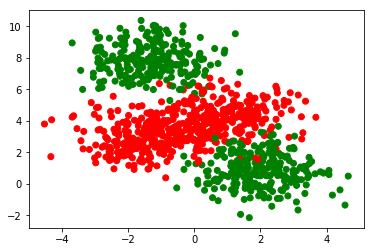

In [68]:
# For sigmoid neuron we need binary classes and hence we create new labels
labels_original = labels
labels = np.mod(labels_original,2)
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

In [0]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, stratify=labels, random_state=0)

#Sigmoid Neuron Classification

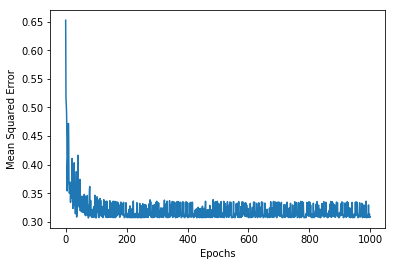

In [70]:
sn = SigmoidNeuron()
sn.fit(x_train, y_train, epochs = 1000 , learning_rate = 0.5, display_loss = True )

In [71]:
y_pred_train = sn.predict(x_train)
y_pred_binarized_train = (y_pred_train >= 0.5).astype("int").ravel()
y_pred_val  = sn.predict(x_val)
y_pred_binarized_val = (y_pred_val >=0.5).astype("int").ravel()
accuracy_train = accuracy_score(y_pred_binarized_train,y_train)
accuracy_test = accuracy_score(y_pred_binarized_val,y_val)
print("training accuracy", round(accuracy_train,2))
print("test accuracy",round(accuracy_test,2))

training accuracy 0.68
test accuracy 0.64


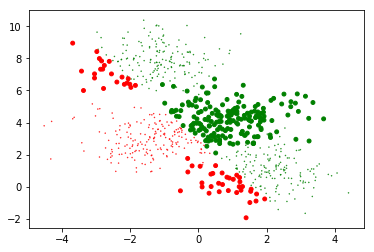

In [72]:
plt.scatter(x_train[:,0],x_train[:,1], c = y_pred_binarized_train, cmap = my_cmap, s = 15 * np.abs(y_pred_binarized_train - y_train) + 0.2 )
plt.show()

# FeedForward Neural Network from scratch
The network consist of 1 hidden layer with 2 neuron and 1 neuron at the output layer i.e. it has 6 weights and 3 biases as its parameters 

In [0]:
class FeedForwardNN():

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0 
    self.b2 = 0
    self.b3 = 0 

  def sigmoid(self,x):
    return 1.0 / (1.0 + np.exp(-x))

  def forward_pass(self,x):
    self.x1, self.x2 = x 
    self.a1 = self.w1 * self.x1 + self.w2 * self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3 * self.x1 + self.w4 * self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5 * self.h1 + self.w6 * self.h2 + self.b3 
    self.h3 = self.sigmoid(self.a3)
    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)

  def fit(self, X, Y, epochs = 1, learning_rate =1, initialise = True, display_loss = False):

    if initialise: 
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
    
    if display_loss:
      loss ={}
    
    for i in tqdm_notebook(range(epochs), total = epochs, unit ="epoch"): 
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3 

      m = X.shape[1]
      self.w1 -= learning_rate * dw1/m 
      self.w2 -= learning_rate * dw2/m
      self.w3 -= learning_rate * dw3/m 
      self.w4 -= learning_rate * dw4/m
      self.w5 -= learning_rate * dw5/m 
      self.w6 -= learning_rate * dw6/m
      self.b1 -= learning_rate * db1/m 
      self.b2 -= learning_rate * db2/m
      self.b3 -= learning_rate * db3/m 

      if display_loss:
        y_pred = self.predict(X)
        loss[i] = mean_squared_error(y_pred,Y)

    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()


  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  
    
    
    
    

#Feed Forward Neural Network Classification 

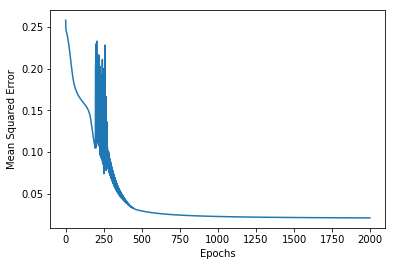

In [74]:
ffn = FeedForwardNN()
ffn.fit(x_train, y_train, epochs=2000, learning_rate=.01, display_loss=True)

In [75]:
y_pred_train = ffn.predict(x_train)
y_pred_binarized_train = (y_pred_train >=0.5).astype("int").ravel()
y_pred_val = ffn.predict(x_val)
y_pred_binarized_val = (y_pred_val >=0.5).astype("int").ravel()
accuracy_train = accuracy_score(y_train,y_pred_binarized_train)
accuracy_test  = accuracy_score(y_val, y_pred_binarized_val)
print("NN Training Accuracy", round(accuracy_train,2))
print("NN testing accuracy", round(accuracy_test,2))

NN Training Accuracy 0.98
NN testing accuracy 0.94


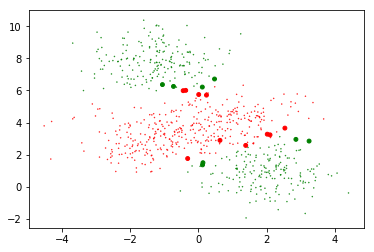

In [76]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred_binarized_train, cmap =my_cmap, s= 15 * np.abs(y_pred_binarized_train - y_train) + 0.2)
plt.show()